# <center>Ejercicio 3 - Modelos de Regresión</center>
# <center>Grupo 11</center>

#Integrantes:
- Blas Chuc - 110253
- Franco Rodriguez - 108799
- Helen Chen - 110195
- Tomas Caporaletti - 108598
- Lorenzo Busato - 110490

##Importar librerias

In [1]:
#Básico
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer

#Descarga de modelos
from joblib import dump

##Imputación
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

##Entrenamiento
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RandomizedSearchCV

##Modelos
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

##Metricas
from sklearn import metrics

##Análisis Exploratorio y Preprocesamiento

In [2]:
df = pd.read_csv('listings.csv')

In [3]:
pd.set_option("display.max_rows", None)     # muestra todas las filas
pd.set_option("display.max_columns", None)  # muestra todas las columnas

df.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,20250625031918,2025-06-26,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/00de1...,https://a0.muscache.com/im/pictures/user/00de1...,NaN,1.0,1.0,"['email', 'phone', 'work_email']",t,t,"Mexico City, D.f., Mexico",Cuajimalpa de Morelos,NaN,19.38283,-99.27178,Entire villa,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Kitchen"", ""Resort access"", ""Hot water"", ""Cou...","$3,799.00",1,7,1.0,1.0,7.0,7.0,1.0,7.0,NaN,t,29,59,89,364,2025-06-26,0,0,0,188,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,44616,https://www.airbnb.com/rooms/44616,20250625031918,2025-07-01,city scrape,Condesa Haus,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,"Mexico City, Mexico",Condesa Haus Rentals offers independent stud...,within an hour,100%,91%,f,https://a0.muscache.com/im/users/196253/profil...,https://a0.muscache.com/im/users/196253/profil...,Condesa,13.0,13.0,"['email', 'phone', 'work_email']",t,t,NaN,Cuauhtémoc,NaN,19.41162,-99.17794,Entire home,Entire home/apt,14,5.5,5.5 baths,5.0,8.0,"[""Free street parking"", ""Free parking on premi...","$18,000.00",1,180,1.0,1.0,180.0,180.0,1.0,180.0,NaN,t,29,59,89,360,2025-07-01,65,1,0,179,0,6,108000.0,2011-11-09,2025-01-01,4.59,4.56,4.7,4.87,4.78,4.98,4.47,NaN,f,9,4,2,0,0.39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26401 entries, 0 to 26400
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26401 non-null  int64  
 1   listing_url                                   26401 non-null  object 
 2   scrape_id                                     26401 non-null  int64  
 3   last_scraped                                  26401 non-null  object 
 4   source                                        26401 non-null  object 
 5   name                                          26401 non-null  object 
 6   description                                   25633 non-null  object 
 7   neighborhood_overview                         13970 non-null  object 
 8   picture_url                                   26401 non-null  object 
 9   host_id                                       26401 non-null 

In [5]:
df.isna().sum() / len(df) * 100

,0
id,0.000000
listing_url,0.000000
scrape_id,0.000000
last_scraped,0.000000
source,0.000000
name,0.000000
description,2.908981
neighborhood_overview,47.085338
picture_url,0.000000
host_id,0.000000


Eliminamos aquellas columnas que por definición no tienen información que nos sea relevante para la predicción.
Debido a que contienen texto que hace referencia a imagenes o son urls, que corresponden a un id o que es información propia de AirBnB propia (los usuarios no pueden verla).

In [6]:
df_limpia1 = df.copy()

df_limpia1.drop(['id', 'source', 'listing_url', 'scrape_id', 'last_scraped', 'picture_url', 'host_id', 'host_url', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url'], axis='columns', inplace=True)

También eliminaremos aquellas que tengan más de un 45% de valores NaN, ya que será muy dificil imputar los datos y afectará las predicciones.

In [7]:
df_limpia2 = df_limpia1.copy()

df_limpia2.drop(['neighborhood_overview', 'neighbourhood' ,'neighbourhood_group_cleansed', 'calendar_updated', 'license'], axis='columns', inplace=True)

Aquellas que son redundantes (información numérica también expresada en texto o misma información numérica en más de una columna).

In [8]:
df_limpia3 = df_limpia2.copy()

df_limpia3.drop(['bathrooms_text', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis='columns', inplace=True)

Información relacionada al host, la cual no tiene porque influir en el precio, porque es información personal del propietario o variables tecnicas de la plataforma.

In [9]:
df_limpia4 = df_limpia3.copy()

df_limpia4.drop(['host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis='columns', inplace=True)

Aquellas columnas relacionadas a las reviews, ya que esto si puede influir en la decisión de un cliente en alquilar o no dicha propiedad, pero no el precio de la misma.

In [10]:
df_limpia5 = df_limpia4.copy()

df_limpia5.drop(['first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month'], axis='columns', inplace=True)

Luego de haber eliminado, por grupos, aquellas variables que claramente no nos aportan información para las predicciones o complican el procesamiento de los datos, podemos ver aquellas que nos quedan.

In [11]:
df_limpia = df_limpia5.copy()

df_limpia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26401 entries, 0 to 26400
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       26401 non-null  object 
 1   description                25633 non-null  object 
 2   neighbourhood_cleansed     26401 non-null  object 
 3   latitude                   26401 non-null  float64
 4   longitude                  26401 non-null  float64
 5   property_type              26401 non-null  object 
 6   room_type                  26401 non-null  object 
 7   accommodates               26401 non-null  int64  
 8   bathrooms                  23120 non-null  float64
 9   bedrooms                   25477 non-null  float64
 10  beds                       23104 non-null  float64
 11  amenities                  26401 non-null  object 
 12  price                      23127 non-null  object 
 13  minimum_nights             26401 non-null  int

De estas variables, aun hay algunas que no nos ayudarán a predecir mejor el precio de un alquiler. Por ello, podemos quedarnos unicamente con las si lo sean.

In [12]:
cols = ['room_type', 'accommodates', 'bathrooms', 'bedrooms', 'price', 'minimum_nights', 'maximum_nights', 'instant_bookable', 'amenities']

df_reducido = df_limpia[cols].copy()

Las variables que finalmente nos quedamos se pueden dividir en:

Cualitativas:
- `room_type` : Indica el tipo de lugar para alojarse, estos pueden ser: casa entera, habitación privada, habitacion compartida y habitacion de hotel.
- `amenities` : Un listado de todas las prestaciones del lugar de alojamiento.
- `instant_bookable` : Define si se puede realizar una reserva sin tener la validación del propietario.

Cuantitativas:
- `accommodates`: Máxima cantidad de personas para el alojamiento.
- `bathrooms` : Cantidad de baños del alojamiento.
- `bedrooms` : Cantidad de habitaciones del alojamiento.
- `price` : Precio del alojamiento.
- `minimum_nights` : Cantidad mínima de noches por la que se puede reservar el alojamiento.
- `maximum_nights` : Cantidad máxima de noches por la que se puede reservar el alojamiento.

In [13]:
df_reducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26401 entries, 0 to 26400
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   room_type         26401 non-null  object 
 1   accommodates      26401 non-null  int64  
 2   bathrooms         23120 non-null  float64
 3   bedrooms          25477 non-null  float64
 4   price             23127 non-null  object 
 5   minimum_nights    26401 non-null  int64  
 6   maximum_nights    26401 non-null  int64  
 7   instant_bookable  26401 non-null  object 
 8   amenities         26401 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 1.8+ MB


Una vez desarrolladas las variables que utilizaremos podemos dar inicio con el preprocesameinto.

##Preprocesamiento

Primero visualizamos en que porcentaje tenemos de valores NaN en cada una de nuestras variables.

In [14]:
df_reducido.isna().sum() / len(df) * 100

,0
room_type,0.000000
accommodates,0.000000
bathrooms,12.427560
bedrooms,3.499867
price,12.401045
minimum_nights,0.000000
maximum_nights,0.000000
instant_bookable,0.000000
amenities,0.000000


Debido a que el "price" es nuestra variable objetivo, que un 12.4% de dicha variable tiene valores NaN y tenemos un total de 26401 registros (lo cual no es de un tamaño menor), podemos extraer todos los registros que contengan NaN en "price", para evitar sesgar o desvalancear nuestras predicciones futuras.

In [15]:
df_reducido.dropna(subset=['price'], inplace=True)

Evaluamos la existencia de registros duplicados

In [16]:
print(df_reducido.duplicated().sum())

239


Al econtrarnos con registros duplicados, los eliminamos todos.

In [17]:
df_reducido.drop_duplicates(inplace=True)

Actualmente las columnas de nuestro dataset se encuentran de esta manera

In [18]:
df_reducido.head(5)

,room_type,accommodates,bathrooms,bedrooms,price,minimum_nights,maximum_nights,instant_bookable,amenities
0,Entire home/apt,2,1.0,1.0,"$3,799.00",1,7,f,"[""Kitchen"", ""Resort access"", ""Hot water"", ""Cou..."
1,Entire home/apt,14,5.5,5.0,"$18,000.00",1,180,f,"[""Free street parking"", ""Free parking on premi..."
2,Entire home/apt,2,1.0,1.0,$585.00,15,250,f,"[""Dining table"", ""Hot water"", ""Hangers"", ""Esse..."
3,Entire home/apt,4,1.0,2.0,"$1,696.00",2,30,f,"[""Hot water"", ""TV with standard cable"", ""Hange..."
4,Entire home/apt,2,1.0,1.0,"$1,004.00",3,180,f,"[""Varies conditioner"", ""Dining table"", ""Free s..."


Podemos observar como está dispuesta la información dentro de cada variable, lo cual puede dificultar o imposibilitar el procesamiento de los modelos, entonces trabajaremos sobre ellas.

###Price

Eliminamos el signo "$" que se encuentra delante de cada valor y lo convertimos en un float

In [19]:
df_reducido["price"] = df_reducido["price"].replace(r'[\$,]', '', regex=True).astype(float, copy=True)

###Instant bookable

Dejamos de percibir si es posible reservar sin la previa autorización del propietario con un "t" (True) y un "f" (False), para pasar a binario.

In [20]:
df_reducido["instant_bookable"] = df_reducido["instant_bookable"].map({"t": 1, "f": 0})

###Room type

Dado que tenemos 4 categorías dentro de esta variable, lo mejor es realizar un One Hot Encoding, donde eliminamos una de ella para reducir la cantidad de columnas y que los modelos igualmente puedan determinar de cual se está tratando.

In [21]:
df_ohe = pd.get_dummies(df_reducido, columns=['room_type'], drop_first=True)

In [22]:
df_ohe.head(1)

,accommodates,bathrooms,bedrooms,price,minimum_nights,maximum_nights,instant_bookable,amenities,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,2,1.0,1.0,3799.0,1,7,0,"[""Kitchen"", ""Resort access"", ""Hot water"", ""Cou...",False,False,False


Tenemos separado cada tipo, en una nueva variable, pero es conveniente tenerlo en forma binaria.

In [23]:
cols_booleanas = ["room_type_Hotel room", "room_type_Private room", "room_type_Shared room"]

df_ohe[cols_booleanas] = df_ohe[cols_booleanas].astype(int)

###Amenities

In [24]:
df_expandido = df_ohe.copy()

Para ver en que estado se encuentran los amenities presentes en los alojamientos, primero analizamos cuantos valores distintos existen dentro de dicha variable. Recorremos cada uno de los elementos, los reducimos a minusculas y luego los contabilizamos.

In [25]:
amenities = df_expandido['amenities'].apply(lambda x: [e.lower() for e in eval(x)]).explode().value_counts()
len(amenities)

6137

In [26]:
print(amenities.index.to_list())

['kitchen', 'wifi', 'hot water', 'hangers', 'dishes and silverware', 'cooking basics', 'essentials', 'iron', 'dedicated workspace', 'bed linens', 'microwave', 'hair dryer', 'long term stays allowed', 'refrigerator', 'shampoo', 'carbon monoxide alarm', 'self check-in', 'smoke alarm', 'tv', 'room-darkening shades', 'extra pillows and blankets', 'first aid kit', 'dining table', 'blender', 'freezer', 'fire extinguisher', 'cleaning products', 'exterior security cameras on property', 'luggage dropoff allowed', 'body soap', 'coffee', 'coffee maker', 'wine glasses', 'elevator', 'shower gel', 'washer', 'laundromat nearby', 'portable fans', 'private entrance', 'oven', 'stove', 'free street parking', 'pets allowed', 'free parking on premises', 'clothing storage: closet', 'toaster', 'hot water kettle', 'outdoor furniture', 'drying rack for clothing', 'outdoor dining area', 'clothing storage', 'conditioner', 'lock on bedroom door', 'single level home', 'books and reading material', 'private patio o

Debido a que la cantidad de valores distintos es muy elevada, podemos intuir que los valores son opciones escritas por los propietarios y una lista sobre la cual se eligen cuales posee o no dicha propiedad.

Como ejemplo de esto, podemos tomar algo común como el Wifi y ver si existe diversidad de formatos para informar que un alojaiento tiene Wifi.

In [27]:
valores_similares = []

for e in amenities.index:
  if "wifi" in e:
    valores_similares.append(e)

print(valores_similares)

['wifi', 'pocket wifi', 'fast wifi – 52 mbps', 'fast wifi – 50 mbps', 'fast wifi – 93 mbps', 'fast wifi – 51 mbps', 'fast wifi – 94 mbps', 'fast wifi – 62 mbps', 'fast wifi – 54 mbps', 'fast wifi – 55 mbps', 'fast wifi – 83 mbps', 'fast wifi – 60 mbps', 'fast wifi – 58 mbps', 'fast wifi – 79 mbps', 'wifi – 49 mbps', 'fast wifi – 78 mbps', 'wifi – 31 mbps', 'wifi – 41 mbps', 'fast wifi – 57 mbps', 'fast wifi – 95 mbps', 'fast wifi – 96 mbps', 'fast wifi – 200 mbps', 'wifi – 44 mbps', 'fast wifi – 80 mbps', 'fast wifi – 82 mbps', 'wifi – 45 mbps', 'wifi – 42 mbps', 'fast wifi – 67 mbps', 'wifi – 30 mbps', 'wifi – 40 mbps', 'fast wifi – 92 mbps', 'fast wifi – 151 mbps', 'fast wifi – 120 mbps', 'fast wifi – 76 mbps', 'wifi – 47 mbps', 'wifi – 46 mbps', 'fast wifi – 59 mbps', 'fast wifi – 99 mbps', 'fast wifi – 91 mbps', 'fast wifi – 97 mbps', 'wifi – 35 mbps', 'fast wifi – 119 mbps', 'fast wifi – 197 mbps', 'wifi – 48 mbps', 'fast wifi – 81 mbps', 'fast wifi – 124 mbps', 'fast wifi – 71 mb

Para evitar tener que manejar un gran volumen de valores distintos para cada amenitie del alojamiento, con la siguiente funcion observaremos cuales son los valores más mencionados

In [28]:
palabras = " ".join(amenities.index).split()

contador = Counter(palabras)

mas_comunes = contador.most_common(50)

print(mas_comunes)

[('with', 1975), ('hdtv', 1665), ('inch', 1562), ('available', 951), ('amazon', 934), ('prime', 924), ('netflix,', 873), ('video,', 806), ('standard', 673), ('body', 659), ('soap', 644), ('-', 599), ('cable', 576), ('disney+,', 552), ('shampoo', 551), ('hbo', 532), ('–', 516), ('housekeeping', 469), ('cable,', 466), ('netflix', 465), ('wifi', 449), ('mbps', 447), ('max,', 435), ('tv', 412), ('tv,', 407), ('fast', 399), ('to', 391), ('apple', 382), ('premium', 378), ('at', 353), ('conditioner', 351), ('extra', 343), ('cost', 339), ('from', 337), ('stove', 311), ('am', 302), ('roku', 296), ('sound', 295), ('system', 293), ('stainless', 284), ('steel', 284), ('oven', 251), ('refrigerator', 245), ('pm,', 220), ('pool', 217), ('bluetooth', 213), ('roku,', 212), ('a', 203), ('chromecast,', 185), ('55', 167)]


Luego de obtener cuales son las más frecuentes, e ir repitiendo el proceso de buscar similitudes razonables, con la función de los valores_similares, llegamos a la conclusión que los valores incluidos dentro de la lista "palabras_clave", son aquellas que se pueden agrupar dentro de un solo valor conciso y que los valores originales que son similares, varían en las marcas del producto, la velocidad de conectividad, el tamaño de los dispositivos, formatos en el que se presentan, tipos de conexión u horarios de disponibilidad.

In [29]:
amenities_reducidos = []
palabras_clave = ["wifi", "tv", "shampoo", "soap", "refrigerator", "conditioner", "body", "housekeeping", "sound", "stove", "pool", "oven", "coffee", "paid parking", "free parking", "exercise equipment"]

for e in amenities.index:
  verdad = False
  for i in palabras_clave:
    if i in e:
      verdad = True
      break
  if not verdad:
    amenities_reducidos.append(e)

print(len(amenities_reducidos))

350


Estos 350 resultados, son los que no se pueden agrupar o su agrupación no reduce significativamente la cantidad de variables únicas existentes.

In [30]:
lista_completa = amenities_reducidos.copy()
lista_completa.extend(palabras_clave)

len(lista_completa)

366

Los 366 valores son los que utilizaremos para el filtrado y reducción de valores como característica de cada uno de los alojamientos. Por lo tanto, un alojamiento que originalmente expresa que posee "fast wifi" pasará a tener "wifi".

In [31]:
def limpiar_amenities(lst):
    resultado = []
    for a in lst:
        texto = a.lower()
        for amenitie in lista_completa:
            if amenitie in texto:
                resultado.append(amenitie)

    return resultado

def solve_amenities(df_amenities, lista_completa):

    df_amenities['amenities'] = df_amenities['amenities'].apply(lambda x: [e.lower() for e in eval(x)])

    df_amenities['amenities'] = df_amenities['amenities'].apply(
        lambda lst: limpiar_amenities(lst)
    )

    mlb = MultiLabelBinarizer(sparse_output=False)
    amenities_encoded = mlb.fit_transform(df_amenities['amenities'])

    new_df_ohe = pd.DataFrame(amenities_encoded, columns=mlb.classes_, index=df_amenities.index)

    df_final = pd.concat([df_amenities.drop(columns=['amenities']), new_df_ohe], axis=1)

    return df_final, mlb

df_amenities, mlb = solve_amenities(df_expandido, lista_completa)

print("Cantidad de columnas generadas:", len(mlb.classes_))


Cantidad de columnas generadas: 366


In [32]:
df_amenities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22888 entries, 0 to 26400
Columns: 376 entries, accommodates to wine glasses
dtypes: float64(3), int64(373)
memory usage: 65.8 MB


Por lo tanto, en su máxima expansión, tenemos 376 columnas.

###Análisis de outliers con cálculo intercuantil

Utilizaremos este método para eliminar con un criterio, los alojamientos que se escapen de un rango máximo de 3 veces el rango intercuartil. En las variables cuantitativas de "price", "bedrooms" y "bathrooms".

####Price

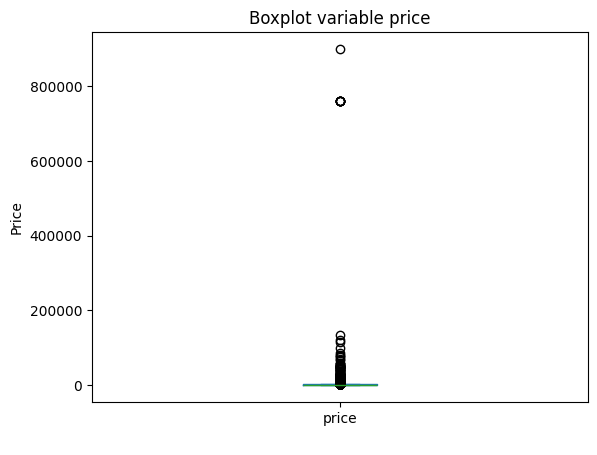

In [33]:
grf=df_amenities['price'].plot.box(title="Boxplot variable price",xlabel=" ",ylabel="Price")

In [34]:
Q1 = df_amenities["price"].quantile(0.25)
Q3 = df_amenities["price"].quantile(0.75)
IQR = Q3 - Q1

limite_superior = Q3 + 3 * IQR

print(f"Límite superior = {limite_superior}")

cantidad_extremos = (df_amenities["price"] > limite_superior).sum()
print(f"Porcentaje de registros con 3 veces el IQR es: {cantidad_extremos/ len(df_amenities) * 100} %")

Límite superior = 4710.0
Porcentaje de registros con 3 veces el IQR es: 3.6569381335197484 %


In [35]:
indexs = df_amenities[df_amenities["price"] >= limite_superior].index
df_amenities.drop(indexs, inplace=True)

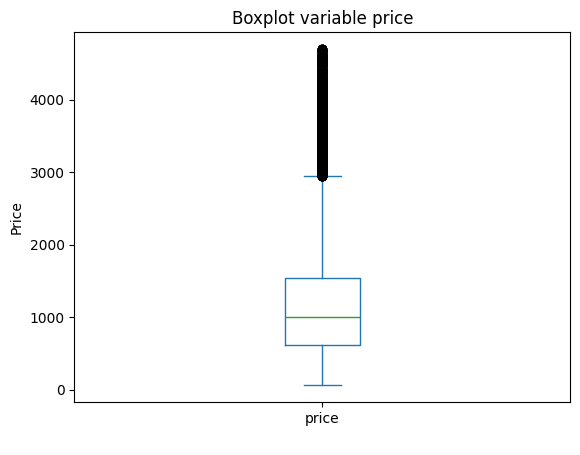

In [36]:
grf=df_amenities['price'].plot.box(title="Boxplot variable price",xlabel=" ",ylabel="Price")

####Bedrooms

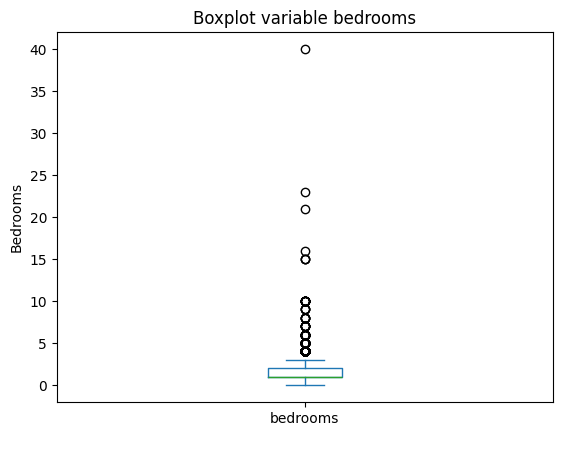

In [37]:
grf=df_amenities['bedrooms'].plot.box(title="Boxplot variable bedrooms",xlabel=" ",ylabel="Bedrooms")

In [38]:
df_amenities["bedrooms"] = df_amenities["bedrooms"].round(0)

In [39]:
Q1 = df_amenities["bedrooms"].quantile(0.25)
Q3 = df_amenities["bedrooms"].quantile(0.75)
IQR = Q3 - Q1

limite_superior = Q3 + 3 * IQR

print(f"Límite superior = {limite_superior}")

cantidad_extremos = (df_amenities["bedrooms"] > limite_superior).sum()
print(f"Porcentaje de registros con 3 veces el IQR es: {cantidad_extremos/ len(df_amenities) * 100} %")

Límite superior = 5.0
Porcentaje de registros con 3 veces el IQR es: 0.30837603736791985 %


In [40]:
indexs = df_amenities[df_amenities["bedrooms"] >= limite_superior].index
df_amenities.drop(indexs, inplace=True)

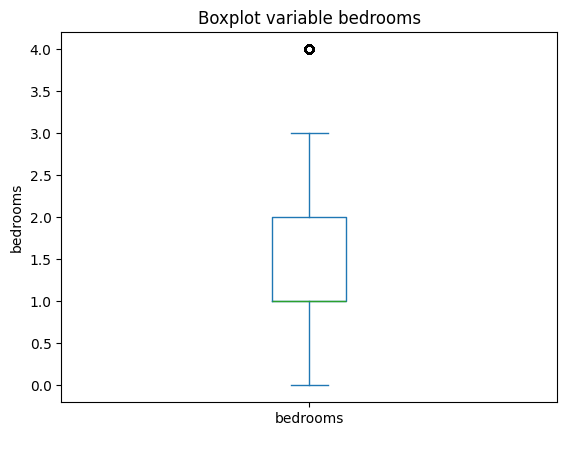

In [41]:
grf=df_amenities['bedrooms'].plot.box(title="Boxplot variable bedrooms",xlabel=" ",ylabel="bedrooms")

####Bathrooms

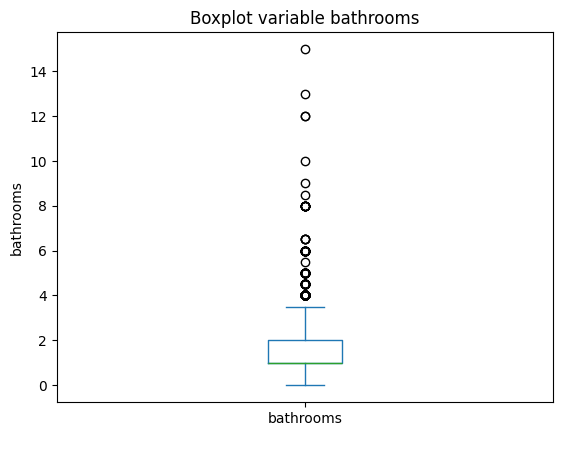

In [42]:
grf=df_amenities['bathrooms'].plot.box(title="Boxplot variable bathrooms",xlabel=" ",ylabel="bathrooms")

In [43]:
df_amenities["bathrooms"] = df_amenities["bathrooms"].round(0)

In [44]:
Q1 = df_amenities["bathrooms"].quantile(0.25)
Q3 = df_amenities["bathrooms"].quantile(0.75)
IQR = Q3 - Q1

limite_superior = Q3 + 3 * IQR

print(f"Límite superior = {limite_superior}")

cantidad_extremos = (df_amenities["bathrooms"] > limite_superior).sum()
print(f"Porcentaje de registros con 3 veces el IQR es: {cantidad_extremos/ len(df_amenities) * 100} %")

Límite superior = 5.0
Porcentaje de registros con 3 veces el IQR es: 0.22815423226100845 %


In [45]:
indexs = df_amenities[df_amenities["bathrooms"] >= limite_superior].index
df_amenities.drop(indexs, inplace=True)

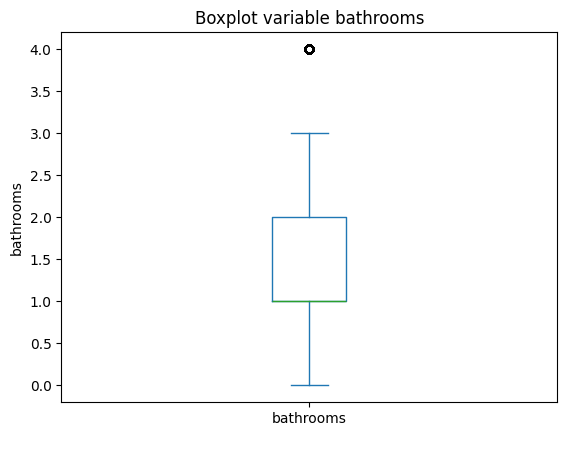

In [46]:
grf=df_amenities['bathrooms'].plot.box(title="Boxplot variable bathrooms",xlabel=" ",ylabel="bathrooms")

Una vez eliminados todos los outliers, reseteamos los indices de nuestro dataframe.

In [47]:
df_amenities.reset_index(drop=True, inplace=True)

###Imputacion

Completamos los datos de "bathrooms", "bedrooms" y con el modelo de Regresión Lineal de forma multivariada.
Para lo cual tambien usaremos la información de "accommodates", ya que hay una relación directa entre la cantidad de personas que se pueden quedar en el alojamiento y la cantidad de baños y dormitorios.

In [48]:
lr = LinearRegression()
imp = IterativeImputer(
    estimator=lr, missing_values=np.nan, max_iter=20, verbose=0, random_state=5
)

columnas = ["bathrooms", "bedrooms", "accommodates"]

df_imputado_array = imp.fit_transform(df_amenities[columnas])

df_imputado = pd.DataFrame(df_imputado_array, columns=columnas, index=df_amenities.index)

df_amenities[columnas] = df_imputado

##Modelos

Una vez realizado el preprocesamiento, podemos aplicar los siguientes 3 modelos en búsqueda de una comparativa para definir cual es el mejor para este caso.

In [49]:
df_resultados = pd.DataFrame(columns=["Modelo", "MSE", "RMSE", "R²", "MAPE"])

Nuestra variable objetivo será el "price".

In [50]:
objetivo = "price"

Para cada uno de los modelos realizaremos una copia del dataframe, así no se altera el original en ningún caso.

###Modelo 1 - Regresión Lineal

In [51]:
df_regresion_lineal = df_amenities.copy()

In [52]:
df_comp_lineal = pd.DataFrame(columns=["Tipo", "MSE", "RMSE", "R²", "MAPE"])

In [53]:
x = df_regresion_lineal.drop(columns=objetivo)
y = df_regresion_lineal[objetivo]

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [55]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

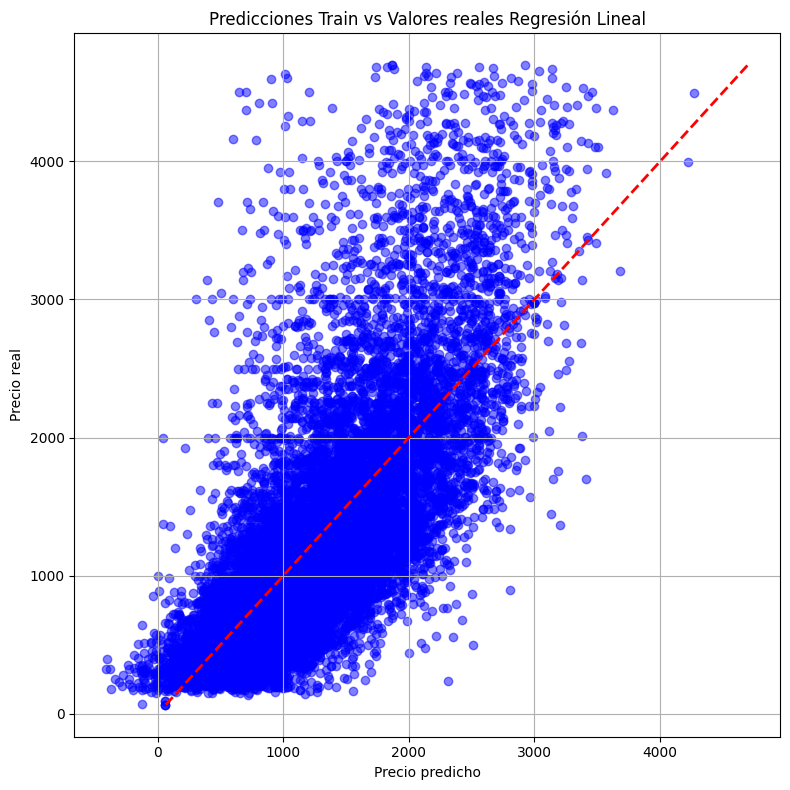

In [56]:
y_pred = model.predict(x_train)

plt.figure(figsize=(8, 8))
plt.scatter(y_pred, y_train, alpha=0.5, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2)

plt.title('Predicciones Train vs Valores reales Regresión Lineal')
plt.xlabel('Precio predicho')
plt.ylabel('Precio real')
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
mse = metrics.mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_train, y_pred)
mape = metrics.mean_absolute_percentage_error(y_train, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)
print("MAPE:", mape, "%")

MSE: 307440.81991352636
RMSE: 554.4734618658736
R²: 0.5483724753654502
MAPE: 0.401580902069706 %


Gaurdamos los valores de Train, para luego compararlos con los de Test.

In [58]:
df_comp_lineal.loc[0] = ['Train', mse, rmse, r2, mape]

Ahora predecimos con Test.

In [59]:
y_pred = model.predict(x_test)

In [60]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)
print("MAPE:", mape, "%")

MSE: 301333.74682239146
RMSE: 548.9387459656965
R²: 0.5386381868280532
MAPE: 0.4070607979880772 %


Guardamos los resultados de la predicción para la "Regresión Lineal".

In [61]:
df_resultados.loc[0] = ['Regresión Lineal', mse, rmse, r2, mape]

In [62]:
df_comp_lineal.loc[1] = ['Test', mse, rmse, r2, mape]

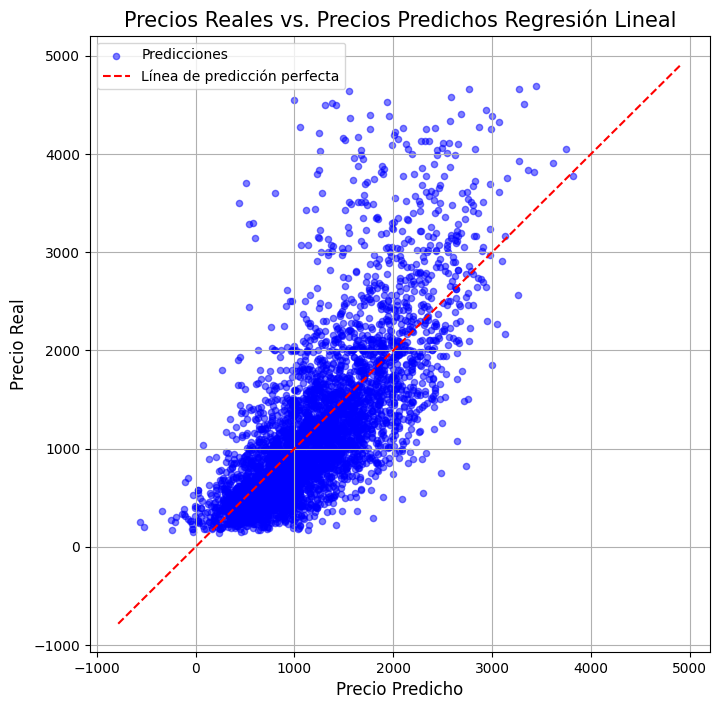

In [63]:
new_df = y_test.to_frame()
new_df["y_pred"] = y_pred

fig, ax = plt.subplots(figsize=(8, 8))

new_df.plot(
    kind='scatter',
    x="y_pred",
    y="price",
    ax=ax,
    label='Predicciones',
    color='blue',
    alpha=0.5
)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, '--', color='red', label='Línea de predicción perfecta')

ax.set_title("Precios Reales vs. Precios Predichos Regresión Lineal", fontsize=15)
ax.set_xlabel("Precio Predicho", fontsize=12)
ax.set_ylabel("Precio Real", fontsize=12)
ax.legend()
ax.grid(True)

plt.show()

Ahora podemos ver como se desempeño el modelo en Train y en Test.

In [64]:
df_comp_lineal.head(2)

,Tipo,MSE,RMSE,R²,MAPE
0,Train,307440.819914,554.473462,0.548372,0.401581
1,Test,301333.746822,548.938746,0.538638,0.407061


Notamos que no existe una diferencia significativa entre los resultados en Train y en Test.

###Modelo 2 - XGBoost Regressor

In [65]:
df_xgboost = df_amenities.copy()

In [66]:
df_comp_xgboost = pd.DataFrame(columns=["Tipo", "MSE", "RMSE", "R²", "MAPE"])

In [67]:
x = df_xgboost.drop(columns=objetivo)
y = df_xgboost[objetivo]

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

Buscaremos optimizar los siguientes hiperparámetros:
- `n_estimators` : controla cuántos de estos árboles individuales se añaden al modelo.
- `max_deepth` : La profundidad máxima de un árbol. El aumento de este valor hará que el modelo sea más complejo y más propenso a sobreajustarse.
- `learning_rate` : Reducción del tamaño del paso utilizada en la actualización para evitar el sobreajuste.
- `min_child_weight` : Suma mínima del peso de la instancia necesaria en un hijo. Si el paso de partición del árbol da como resultado un nodo hoja con una suma del peso de la instancia inferior a min_child_weight, el proceso de construcción abandonará la partición posterior.

In [69]:
#Parámetros a optimizar
params_grid = {
    'n_estimators':range(10, 100, 2),
    'max_depth':range(1,10),
    'learning_rate':np.arange(0,1,0.002),
    'min_child_weight':range(1, 5)
}

#Folds
kfoldcv = KFold(n_splits=5, random_state=5, shuffle=True)

#Ramdom Search CV
randomcv = RandomizedSearchCV(XGBRegressor(), params_grid, n_jobs=10, scoring ="neg_mean_absolute_percentage_error",cv=kfoldcv, n_iter=10, random_state=5)
randomcv.fit(x_train,y_train)

print (randomcv.best_score_ * (-1), randomcv.best_params_)

#Mejor Modelo
gb = randomcv.best_estimator_

0.35408637381699404 {'n_estimators': 58, 'min_child_weight': 4, 'max_depth': 6, 'learning_rate': np.float64(0.20400000000000001)}


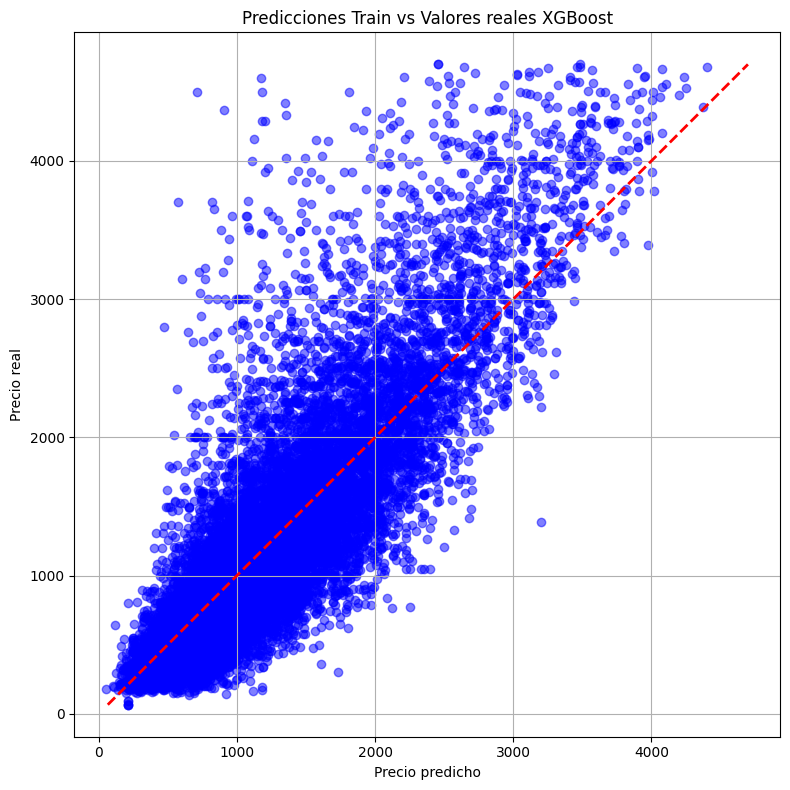

In [70]:
y_pred = gb.predict(x_train)

plt.figure(figsize=(8, 8))
plt.scatter(y_pred, y_train, alpha=0.5, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2)

plt.title('Predicciones Train vs Valores reales XGBoost')
plt.xlabel('Precio predicho')
plt.ylabel('Precio real')
plt.grid(True)
plt.tight_layout()
plt.show()

Gaurdamos los valores de Train, para luego compararlos con los de Test.

In [71]:
df_comp_xgboost.loc[0] = ['Train', mse, rmse, r2, mape]

Ahora predecimos con Test.

In [72]:
y_pred = gb.predict(x_test)

In [73]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)
print("MAPE:", mape, "%")

MSE: 248842.13906857348
RMSE: 498.84079531306725
R²: 0.6190062955612783
MAPE: 0.34509451435217275 %


Guardamos los resultados de la predicción para "XGBoost Regressor".

In [74]:
df_resultados.loc[1] = ['XGBoost Regressor', mse, rmse, r2, mape]

In [75]:
df_comp_xgboost.loc[1] = ['Test', mse, rmse, r2, mape]

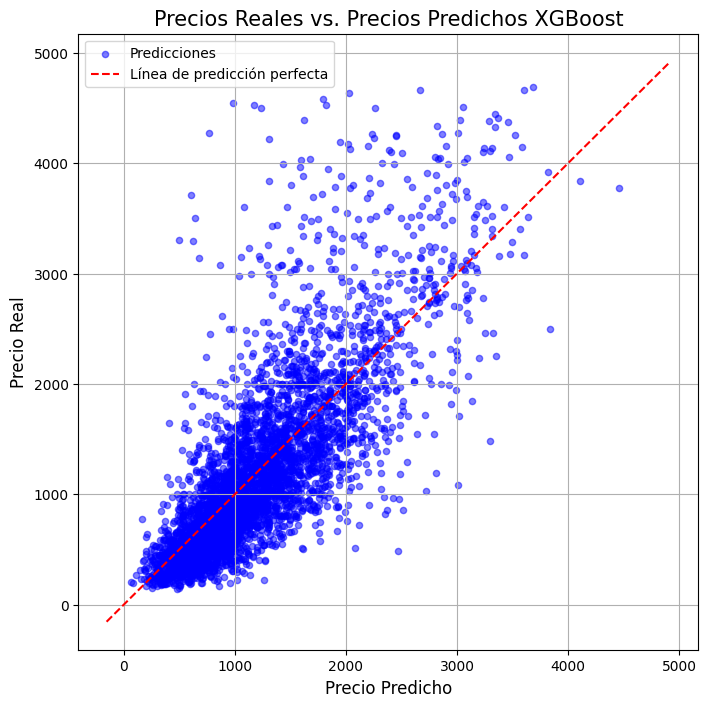

In [76]:
new_df = y_test.to_frame()
new_df["y_pred"] = y_pred

fig, ax = plt.subplots(figsize=(8, 8))

new_df.plot(
    kind='scatter',
    x="y_pred",
    y="price",
    ax=ax,
    label='Predicciones',
    color='blue',
    alpha=0.5
)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, '--', color='red', label='Línea de predicción perfecta')

ax.set_title("Precios Reales vs. Precios Predichos XGBoost", fontsize=15)
ax.set_xlabel("Precio Predicho", fontsize=12)
ax.set_ylabel("Precio Real", fontsize=12)
ax.legend()
ax.grid(True)

plt.show()

Ahora podemos ver como se desempeño el modelo en Train y en Test.

In [77]:
df_comp_xgboost.head(2)

,Tipo,MSE,RMSE,R²,MAPE
0,Train,301333.746822,548.938746,0.538638,0.407061
1,Test,248842.139069,498.840795,0.619006,0.345095


Podemos notar mejores resultados con Test, esto puede deberse a la distribución de los datos en el conjunto de Test.

###Modelo 3 - KNN Regressor

In [78]:
df_knn = df_amenities.copy()

In [79]:
df_comp_knn = pd.DataFrame(columns=["Tipo", "MSE", "RMSE", "R²", "MAPE"])

In [80]:
x = df_knn.drop(columns=objetivo)
y = df_knn[objetivo]

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

Buscaremos optimizar los siguientes hiperparámetros:
- `n_neighbors` : Número de vecinos que se utilizarán por defecto para las consultas de vecinos.
- `wights` : Función de peso utilizada en la predicción. Utilizaremos: "uniform" (implica pesos uniformes. Todos los puntos de cada vecindad se ponderan por igual) y "distance" (ponderar los puntos por la inversa de su distancia. En este caso, los vecinos más cercanos a un punto de consulta tendrán una mayor influencia que los vecinos más lejanos).
- `metrics` : La forma de evaluar las distancias. Utilizaremos: "euclidean" ( se puede computar como: dist(x, y) = sqrt(dot(x, x) - 2 * dot(x, y) + dot(y, y))) y "cosine" (se puede computar como: cosine_similarity(A, B) = (A . B) / (||A|| * ||B||)).

In [82]:
#Parámetros a optimizar
params_grid = {
    'n_neighbors': range(2, 10),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'cosine']
}

#Folds
kfoldcv = KFold(n_splits=5, random_state=5, shuffle=True)

#Ramdom Search CV
randomcv = RandomizedSearchCV(KNeighborsRegressor(), params_grid, n_jobs=10, scoring='neg_mean_absolute_percentage_error',cv=kfoldcv, n_iter=10, random_state=5)
randomcv.fit(x_train,y_train)

print (randomcv.best_score_ * (-1), randomcv.best_params_)

#Mejor Modelo
knn = randomcv.best_estimator_

0.37511426558085365 {'weights': 'distance', 'n_neighbors': 4, 'metric': 'euclidean'}


Una vez entrenado el modelo, podemos ver como se desempeña con los valores de entrenamiento.

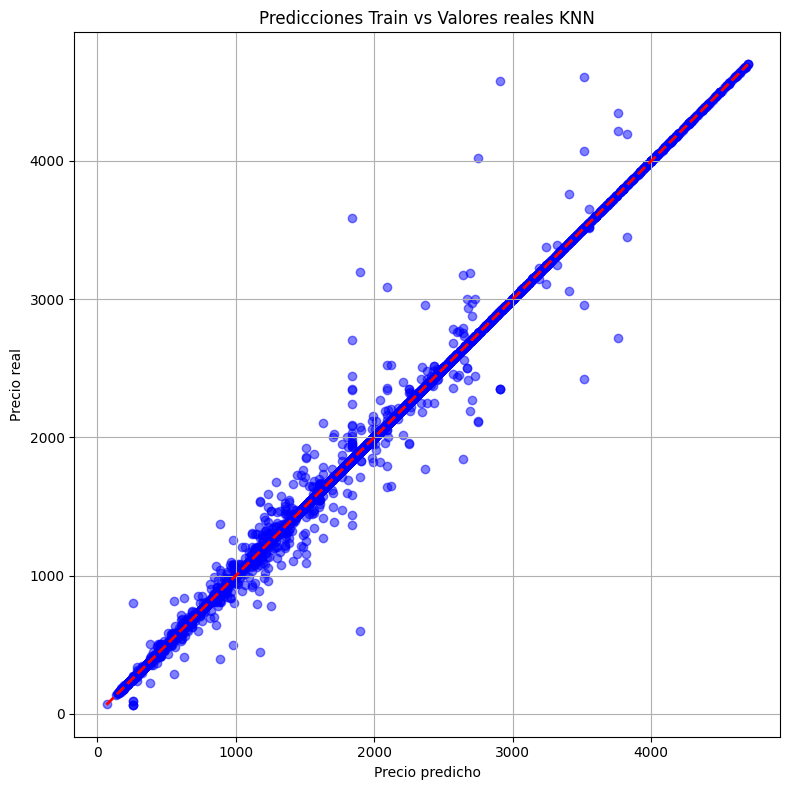

In [83]:
y_pred = knn.predict(x_train)

plt.figure(figsize=(8, 8))
plt.scatter(y_pred, y_train, alpha=0.5, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2)

plt.title('Predicciones Train vs Valores reales KNN')
plt.xlabel('Precio predicho')
plt.ylabel('Precio real')
plt.grid(True)
plt.tight_layout()
plt.show()

In [84]:
mse = metrics.mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_train, y_pred)
mape = metrics.mean_absolute_percentage_error(y_train, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)
print("MAPE:", mape, "%")

MSE: 1984.6431199885453
RMSE: 44.5493335526868
R²: 0.9970845788798783
MAPE: 0.004315026992273353 %


Gaurdamos los valores de Train, para luego compararlos con los de Test.

In [85]:
df_comp_knn.loc[0] = ['Train', mse, rmse, r2, mape]

Ahora predecimos con Test.

In [86]:
y_pred = knn.predict(x_test)

In [87]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)
print("MAPE:", mape, "%")

MSE: 306135.40651585284
RMSE: 553.2950447237466
R²: 0.5312865295849775
MAPE: 0.35895432256686727 %


Guardamos los resultados de la predicción para "KNN Regresión".

In [88]:
df_resultados.loc[2] = ['KNN Regressor', mse, rmse, r2, mape]

In [89]:
df_comp_knn.loc[1] = ['Test', mse, rmse, r2, mape]

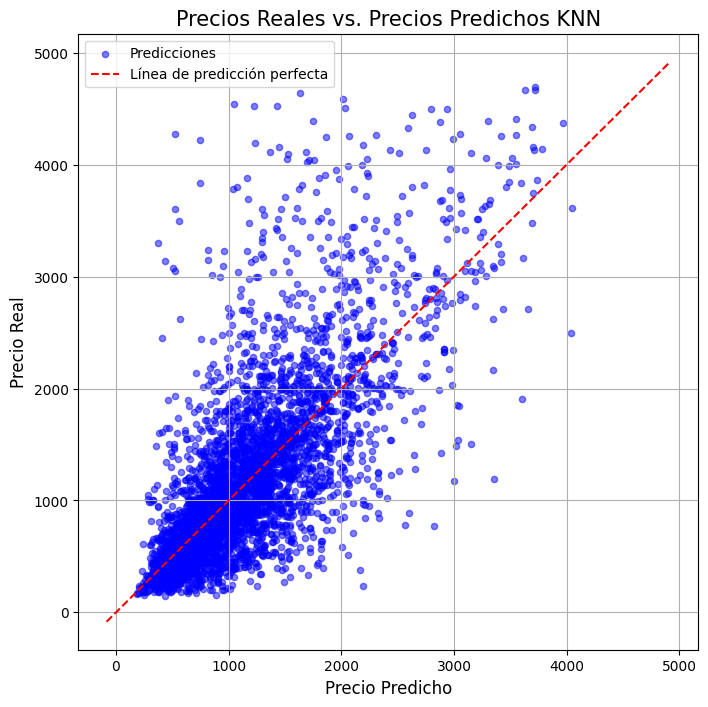

In [90]:
new_df = y_test.to_frame()
new_df["y_pred"] = y_pred

fig, ax = plt.subplots(figsize=(8, 8))

new_df.plot(
    kind='scatter',
    x="y_pred",
    y="price",
    ax=ax,
    label='Predicciones',
    color='blue',
    alpha=0.5
)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, '--', color='red', label='Línea de predicción perfecta')

ax.set_title("Precios Reales vs. Precios Predichos KNN", fontsize=15)
ax.set_xlabel("Precio Predicho", fontsize=12)
ax.set_ylabel("Precio Real", fontsize=12)
ax.legend()
ax.grid(True)

plt.show()

Ahora podemos ver como se desempeño el modelo en Train y en Test.

In [91]:
df_comp_knn.head(2)

,Tipo,MSE,RMSE,R²,MAPE
0,Train,1984.643120,44.549334,0.997085,0.004315
1,Test,306135.406516,553.295045,0.531287,0.358954


En este caso, nos encontramos con unas predicciones muy buenas dentro del conjunto de Train, lo cual no es una buena señal porque implica que tenemos overfitting y el modelo no sabe generalizar.

##Conclusiones

In [92]:
df_resultados.head(3)

,Modelo,MSE,RMSE,R²,MAPE
0,Regresión Lineal,301333.746822,548.938746,0.538638,0.407061
1,XGBoost Regressor,248842.139069,498.840795,0.619006,0.345095
2,KNN Regressor,306135.406516,553.295045,0.531287,0.358954


Con el cuadro de resultados expuesto, podemos concluir que el mejor modelo para predecir el precio en las condiciones dadas fué XGBoost Regressor. En cambio la diferencia entre Regresión Lineal y KNN Regressor no es tan perceptible, pero lo que si nos permite decantarnos por uno o por otro pueden ser los tiempos y la simplicidad, donde sale mejor parado Regresión Lineal.

En términos generales, los resultados no fueron sustancialmente óptimos para predecir los precios de un alojamiento. Esto puede deberse a la no contemplación de la ubicación exacta de cada uno de los alojamientos, la simplificación de los amenities o la exclusión de alguna variable clave que no supimos identificar idoneamente.